Nama  : Indra Maulana R.F.Y

Kelas : Matematika Diskrit A

NPM   : 24083010105

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(42)
df= pd.read_csv('siswa.csv')

criteria_cols = ['adil, amanah','suka membantu','nyambung kalau ngobrol','asyik, menarik (D)']
assert all(c in df.columns for c in criteria_cols), 'Kolom kriteria tidak lengkap di CSV.'

grid = np.round(np.linspace(0, 1, 11), 1)
for c in criteria_cols:
    mask = df[c].isna()
    if mask.any():
        df.loc[mask, c] = np.random.choice(grid, size=mask.sum(), replace=True)
df[criteria_cols] = df[criteria_cols].astype(float)
df.head()

,NPM,NAMA,"adil, amanah",suka membantu,nyambung kalau ngobrol,"asyik, menarik (D)"
0,24083010001,MADINA HEDY ALIFANTI,0.6,0.4,0.9,0.4
1,24083010003,MARIA DWI KURNIASIH,0.3,0.8,0.8,0.2
2,24083010005,ADINDA PUTRI RACHMAWATI,1.0,0.6,0.8,0.0
3,24083010006,AQUINA SYABITA,0.7,0.1,0.0,0.4
4,24083010007,VARID PUTRA PRATAMA,0.4,0.3,0.8,0.9


In [ ]:
P = np.array([0.25, 0.25, 0.25, 0.25])

C = df[criteria_cols].to_numpy()
S = C @ P
df['SKOR'] = S
top4 = df.sort_values('SKOR', ascending=False).head(4)
top4[['NPM','NAMA','SKOR']]

,NPM,NAMA,SKOR
9,24083010029,Yohanes Olvin Jun Sole,0.875
10,24083010034,AISYAH AMALIA HAMID,0.750
31,24083010084,Muhammad Naufal Asruzzaman,0.725
7,24083010019,HIZKIA SAMHAN REZAYOSHI,0.700


Disini saya menjumlahkan empat kriteria per siswa dengan bobot sama yaitu adil/amanah, suka membantu, nyambung kalau ngobrol, asyik/menarik.

dan 4 peringkat teratas yang keluar dari perhitungan tersebut adalah:

Yohanes Olvin Jun Sole — 0,875

AISYAH AMALIA HAMID — 0,750

Muhammad Naufal Asruzzaman — 0,725

HIZKIA SAMHAN REZAYOSHI — 0,700

Artinya, dengan asumsi bobot sama, empat nama ini memiliki skor agregat tertinggi di antara sampel.

In [ ]:
kelasku = C.copy()
cov_mat = np.cov(kelasku, rowvar=False, ddof=1)
corr_mat = np.corrcoef(kelasku, rowvar=False)
cov_df = pd.DataFrame(cov_mat, index=criteria_cols, columns=criteria_cols)
corr_df = pd.DataFrame(corr_mat, index=criteria_cols, columns=criteria_cols)
cov_df.round(3), corr_df.round(3)

(                        adil, amanah  suka membantu  nyambung kalau ngobrol  \
 adil, amanah                   0.091         -0.019                   0.018   
 suka membantu                 -0.019          0.084                  -0.001   
 nyambung kalau ngobrol         0.018         -0.001                   0.110   
 asyik, menarik (D)            -0.009          0.018                  -0.009   
 
                         asyik, menarik (D)  
 adil, amanah                        -0.009  
 suka membantu                        0.018  
 nyambung kalau ngobrol              -0.009  
 asyik, menarik (D)                   0.103  ,
                         adil, amanah  suka membantu  nyambung kalau ngobrol  \
 adil, amanah                   1.000         -0.221                   0.181   
 suka membantu                 -0.221          1.000                  -0.009   
 nyambung kalau ngobrol         0.181         -0.009                   1.000   
 asyik, menarik (D)            -0.090          

Varians (diagonal kovarians) menunjukkan seberapa menyebar nilai tiap kriteria:

adil/amanah: 0,091

suka membantu: 0,084

nyambung saat ngobrol: 0,110 (paling bervariasi)

asyik/menarik (D): 0,103

Korelasi (arah & kekuatan hubungan linier):

adil/amanah ↔ suka membantu: −0,221 → kecenderungan berlawanan (semakin tinggi yang satu, yang lain sedikit menurun di data ini).

adil/amanah ↔ nyambung ngobrol: +0,181 → searah (ringan).

suka membantu ↔ nyambung ngobrol: −0,009 → nyaris tidak berhubungan.

suka membantu ↔ asyik/menarik: +0,184 → searah (ringan).

adil/amanah ↔ asyik/menarik: sekitar −0,09 → berlawanan (ringan).

karena tidak ada korelasi yang sangat kuat (|r| mendekati 1), tiap kriteria menyumbang informasi yang cukup berbeda; ini bagus untuk penilaian multi-aspek.

In [ ]:
X_matrix = kelasku
norms = np.linalg.norm(X_matrix, axis=1, keepdims=True)
cosine_sim = (X_matrix @ X_matrix.T) / (norms @ norms.T)
students = df['NAMA'].astype(str).tolist()
cosine_df = pd.DataFrame(cosine_sim, index=students, columns=students)
cosine_df.iloc[:10, :10].round(3)

,MADINA HEDY ALIFANTI,MARIA DWI KURNIASIH,ADINDA PUTRI RACHMAWATI,AQUINA SYABITA,VARID PUTRA PRATAMA,GAITSA NAZWA KANSA,Mohammad Alimun Hakim,HIZKIA SAMHAN REZAYOSHI,RAVEENA AYU DESEMBER SURYOPUTRI,Yohanes Olvin Jun Sole
MADINA HEDY ALIFANTI,1.000,0.897,0.904,0.625,0.905,0.912,0.935,0.809,0.640,0.906
MARIA DWI KURNIASIH,0.897,1.000,0.846,0.384,0.762,0.912,0.693,0.848,0.644,0.840
ADINDA PUTRI RACHMAWATI,0.904,0.846,1.000,0.661,0.662,0.841,0.839,0.601,0.596,0.842
AQUINA SYABITA,0.625,0.384,0.661,1.000,0.633,0.695,0.803,0.507,0.788,0.803
VARID PUTRA PRATAMA,0.905,0.762,0.662,0.633,1.000,0.877,0.893,0.907,0.719,0.887
GAITSA NAZWA KANSA,0.912,0.912,0.841,0.695,0.877,1.000,0.825,0.927,0.881,0.986
Mohammad Alimun Hakim,0.935,0.693,0.839,0.803,0.893,0.825,1.000,0.693,0.637,0.878
HIZKIA SAMHAN REZAYOSHI,0.809,0.848,0.601,0.507,0.907,0.927,0.693,1.000,0.837,0.890
RAVEENA AYU DESEMBER SURYOPUTRI,0.640,0.644,0.596,0.788,0.719,0.881,0.637,0.837,1.000,0.903
Yohanes Olvin Jun Sole,0.906,0.840,0.842,0.803,0.887,0.986,0.878,0.890,0.903,1.000


Nilai berkisar 0.625–0,935 pada contoh yang terlihat → profil siswa relatif mirip di empat kriteria.

Contoh:

MADINA HEDY ALIFANTI ↔ Mohammad Alimun Hakim : 0,935.

ADINDA PUTRI RACHMAWATI ↔ RAVEENA AYU DESEMBER SURYOPUTRI: 0.596.

Gunanya:

Mengelompokkan siswa dengan profil serupa.

Explained variance ratio: [0.34733126 0.26873321]


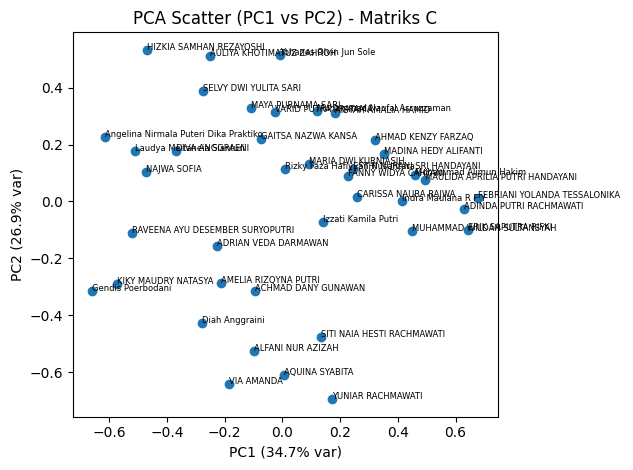

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_matrix)
explained = pca.explained_variance_ratio_
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
pca_df['NAMA'] = students
print('Explained variance ratio:', explained)

plt.figure()
plt.scatter(pca_df['PC1'], pca_df['PC2'])
for _, row in pca_df.iterrows():
    plt.annotate(row['NAMA'], (row['PC1'], row['PC2']), fontsize=6)
plt.title('PCA Scatter (PC1 vs PC2) - Matriks C')
plt.xlabel(f'PC1 ({explained[0]*100:.1f}% var)')
plt.ylabel(f'PC2 ({explained[1]*100:.1f}% var)')
plt.tight_layout()
plt.show()

Explained variance ratio: PC1 = 34,7%, PC2 = 26,9% → dua komponen pertama menangkap ≈61,6% variasi total.

Artinya:

Plot PCA (PC1 vs PC2) sudah cukup bagus untuk melihat pola/kelompok kasar, tapi belum seluruh informasi (sekitar 38% masih di PC3+).

Titik yang berdekatan artinya profil penilaiannya mirip; titik yang jauh berarti kombinasi kriterianya berbeda.